In [99]:
! pip3 install pandas
! pip3 install matplotlib
! pip install plotly



In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px



In [101]:
sales_eu_df = pd.read_csv('sales_europe.csv')
sales_me_df = pd.read_csv('sales_me.csv')
sales_na_df = pd.read_csv('sales_north_america.csv')
purchases_eu_df = pd.read_csv('purchases_europe.csv')




# Plotly

### Sales for the year of 2010 across all countries 


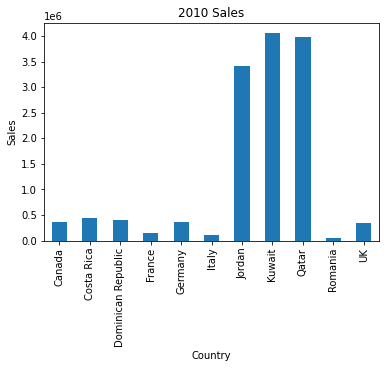

In [102]:
sales = [sales_eu_df,sales_me_df, sales_na_df]
sales_df = pd.concat(sales, keys=['Europe', "Middle East", 'North America'], names=["Area", 'Index']) 

country_sales_2010 = sales_df.groupby('country')['sales_figure'].sum()

country_sales_2010.plot.bar(x=('country'), y=['sales_figure'])
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('2010 Sales')
plt.savefig('./chart_img/1_sales_2010.png')

### Sales for the year of 2010 across each region (i.e. North America, Europe,...)

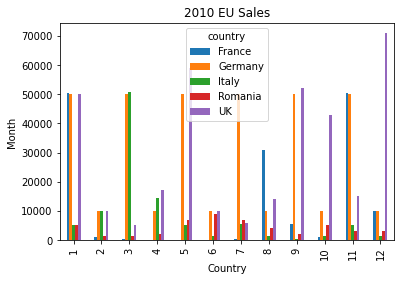

In [103]:
eu_2010 = sales_eu_df.loc[sales_eu_df['year']==2010]

reshape_eu_2010 = eu_2010.pivot(index=['month'], columns="country", values="sales_figure")

reshape_eu_2010.plot.bar()
plt.xlabel('Country')
plt.ylabel('Month')
plt.title('2010 EU Sales')
plt.savefig('./chart_img/2_EU_sales_2010.png')

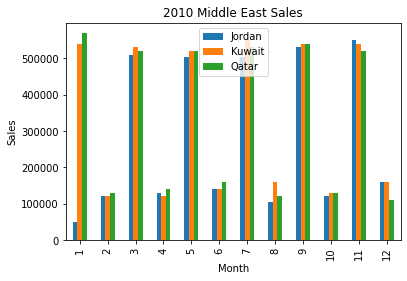

In [104]:
me_2010 = sales_me_df.loc[sales_me_df['year']==2010]

reshape_me_2010 = me_2010.pivot(index=['month'], columns="country", values="sales_figure")

reshape_me_2010.plot.bar()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('2010 Middle East Sales')
plt.savefig('./chart_img/3_Me_sales_2010.png')
plt.legend(loc="upper center")

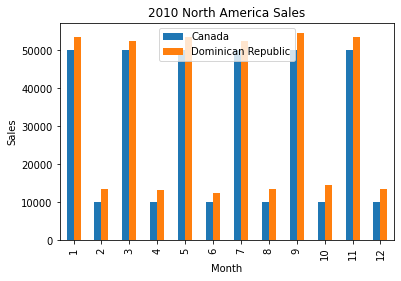

In [105]:
na_2010 = sales_na_df.loc[sales_na_df['year']==2010]

reshape_na_2010 = na_2010.pivot(index=['month'], columns="country", values="sales_figure")


reshape_na_2010.plot.bar()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('2010 North America Sales')
plt.legend(loc="upper center")
plt.savefig('./chart_img/4_NA_sales_2010.png')

### Using line charts Purchase vs Sales for the year of 2010 for all countries in Europe that have both sales and purchase records (one chart per country)

### Germany

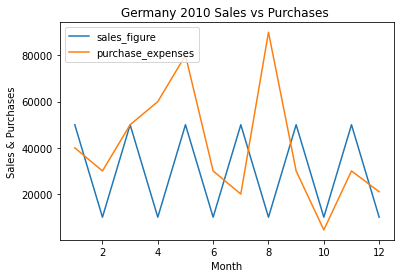

In [106]:
germany_2010_sales_df = sales_eu_df.loc[(sales_eu_df['year']== 2010) & (sales_eu_df['country']== "Germany")]
germany_2010_purchase_df = purchases_eu_df.loc[(sales_eu_df['year']== 2010) & (purchases_eu_df['country']== "Germany")]

germany_2010_merge = germany_2010_sales_df.merge(germany_2010_purchase_df, how="left")

germany_2010_merge.plot(x="month", y=["sales_figure", "purchase_expenses"])
plt.xlabel('Month')
plt.ylabel('Sales & Purchases')
plt.title('Germany 2010 Sales vs Purchases ')
plt.legend(loc="upper left")
plt.savefig('./chart_img/5_germany_sales_purchase_2010.png')



### Romania

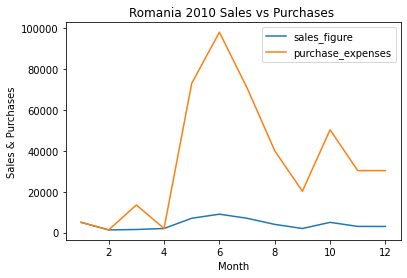

In [107]:
romania_2010_sales_df = sales_eu_df.loc[(sales_eu_df['year']== 2010) & (sales_eu_df['country']== "Romania")]
romania_2010_purchase_df = purchases_eu_df.loc[(sales_eu_df['year']== 2010) & (purchases_eu_df['country']== "Romania")]

romania_2010_merge = romania_2010_sales_df.merge(romania_2010_purchase_df, how="left")

romania_2010_merge.plot(x="month", y=["sales_figure", "purchase_expenses"])
plt.xlabel('Month')
plt.ylabel('Sales & Purchases')
plt.title('Romania 2010 Sales vs Purchases ')
plt.legend(loc="upper right")
plt.savefig('./chart_img/6_romania_sales_purchase_2010.png')



# Matplotlb

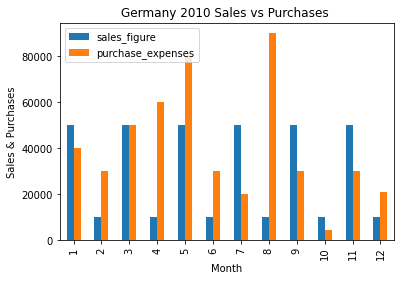

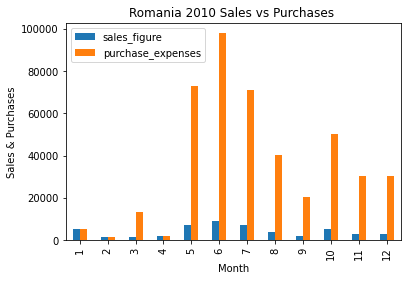

In [108]:
germany_2010_merge.plot.bar(x="month", y=["sales_figure", "purchase_expenses"])
plt.xlabel('Month')
plt.ylabel('Sales & Purchases')
plt.title('Germany 2010 Sales vs Purchases ')
plt.legend(loc="upper left")
plt.savefig('./chart_img/7_germany_sales_purchase_2010_bargraph.png')


romania_2010_merge.plot.bar(x="month", y=["sales_figure", "purchase_expenses"])
plt.xlabel('Month')
plt.ylabel('Sales & Purchases')
plt.title('Romania 2010 Sales vs Purchases ')
plt.legend(loc="upper left")
plt.savefig('./chart_img/8_romania_sales_purchase_2010_bargraph.png')



Create a series containing the sum total of sales in all countries listed. use this series to plot a piechart and label each component

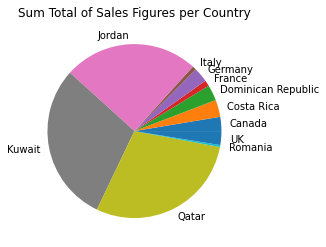

In [109]:
sales_sum_df = sales_df.groupby('country')['sales_figure'].sum()

sales_sum_df.plot.pie()
plt.title('Sum Total of Sales Figures per Country')
plt.ylabel('')

plt.savefig('./chart_img/9_total_sales_figures_pie.png')



Plot a pie chart of the sales made in the top countries from each region, i.e: Identify the country that made the most sales in each region then use this data to plot a pie chart. On this chart, explode only the pie section representing the country with the overall best sale.

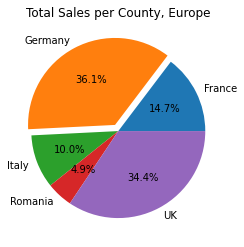

In [110]:
top_sales_eu = sales_df.loc['Europe'].groupby("country")["sales_figure"].sum()

top_sales_eu.plot.pie(explode=(top_sales_eu == max(top_sales_eu)) * 0.08, autopct='%1.1f%%')

plt.title('Total Sales per County, Europe')
plt.ylabel('')
plt.savefig('./chart_img/10_top_sales_figures_EU_pie.png')


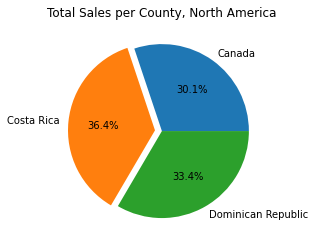

In [111]:
top_sales_na = sales_df.loc['North America'].groupby("country")["sales_figure"].sum()

top_sales_na.plot.pie(explode=(top_sales_na == max(top_sales_na)) * 0.08, autopct='%1.1f%%')

plt.title('Total Sales per County, North America')
plt.ylabel('')
plt.savefig('./chart_img/10_top_sales_figures_NA_pie.png')


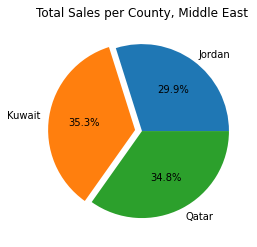

In [112]:
top_sales_me = sales_df.loc['Middle East'].groupby("country")["sales_figure"].sum()

top_sales_me.plot.pie(explode=(top_sales_me == max(top_sales_me)) * 0.08, autopct='%1.1f%%')

plt.title('Total Sales per County, Middle East')
plt.ylabel('')

plt.savefig('./chart_img/10_top_sales_figures_ME_pie.png')
